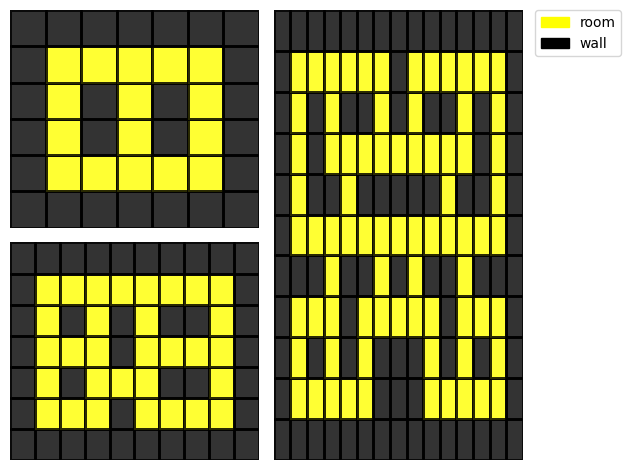

In [4]:
from matplotlib import pyplot as plt
import sys  
sys.path.insert(1, '../')
from pacman_maps import pacman_map1, pacman_map2, pacman_map3

ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

pacman_map1.show(ax=ax1)
pacman_map2.show(ax=ax2)
pacman_map3.show(ax=ax3)
ax1.get_legend().remove()
ax2.get_legend().remove()
plt.tight_layout()
plt.savefig('maps.png', bbox_inches='tight')

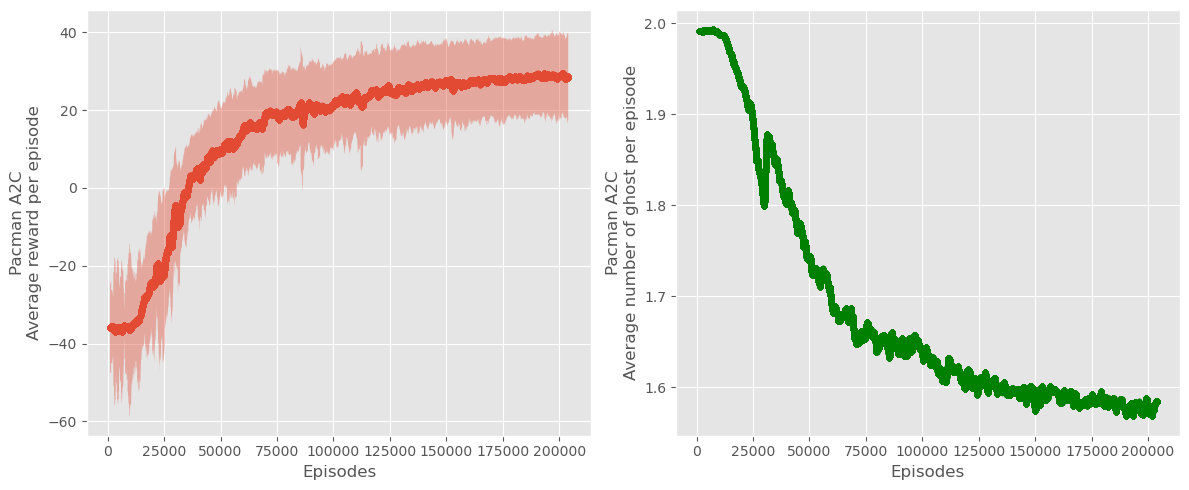

In [159]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('ggplot')

n_envs = 21
rewards = f"Reward per episode on {n_envs} environments"

df = pd.read_csv("/Users/chris/Desktop/CNAM/RCP211/RL/Pacman/Tmp/pacman_a2c_reward_per_episode.csv",
                 header=None, names=[rewards,"Average number of ghost"])

# create a new column for the cumulative average
rolling = 1000
ema = f'ema (rollong {rolling})'
df[ema] = df[rewards].rolling(rolling).mean() / n_envs
df['std'] = df[rewards].rolling(rolling).std() / n_envs

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(df[ema][rolling:],
        linestyle = 'none',
        marker = '.')
ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Pacman A2C\nAverage reward per episode');

x = np.arange(rolling,len(df[ema][rolling:]) + rolling, 1)
ax[0].fill_between(x, df[ema][rolling:] - df['std'][rolling:], df[ema][rolling:] + df['std'][rolling:], alpha=0.4)

ax[1].plot(df["Average number of ghost"].rolling(1000).mean(),
            linestyle = 'none',
            marker = '.', color='g')
ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Pacman A2C\nAverage number of ghost per episode');

plt.tight_layout()
plt.savefig('training.png', bbox_inches='tight')

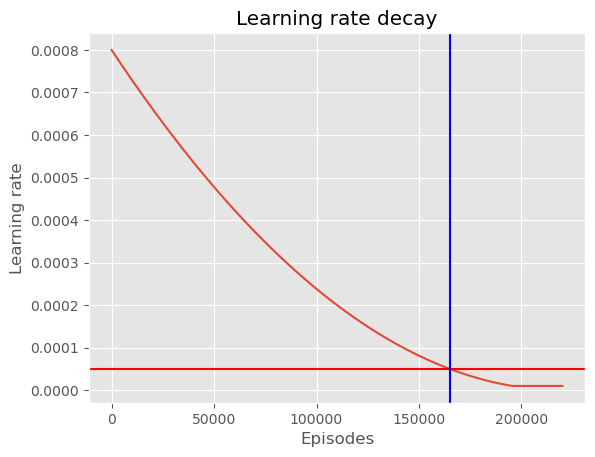

In [119]:
from matplotlib import pyplot as plt

def learning_rate_generator(total_episodes, lr, min_lr):
            updated_lr = lr
            episode = 0
            while episode < total_episodes:
                if updated_lr < min_lr:
                    updated_lr = min_lr
                yield updated_lr
                episode += 1
                updated_lr = lr * (1 - (episode / total_episodes))**2

lr_gen = list(learning_rate_generator(220000, 0.0008, 0.00001))
plt.plot(lr_gen, label='l')
plt.title("Learning rate decay")
plt.xlabel("Episodes")
plt.ylabel("Learning rate")
#plt.axhline(0.00005, color = 'r', label = '0.00005');
#plt.axvline(165000, color = 'b', label = '165000');
plt.savefig('lr.png')

0.07739749485273119


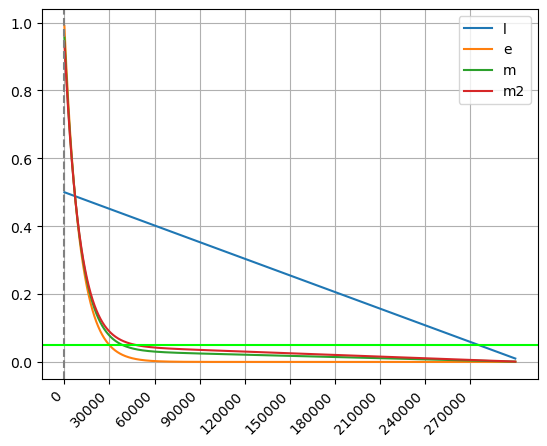

In [16]:
import math
import numpy as np

EPS_START = 0.99
EPS_END = 0.01

e = [EPS_START]
eps = []
m = []
m2 = []
l = []
steps = 210000
for step in range(steps):
    y = (EPS_END - 0.5)*step/steps + 0.5
    l.append(y)
    n = e[-1]*0.9999
    e.append(n)
    r = 0.93
    m.append(r*n + (1-r)*y)
    r = 0.9
    m2.append(r*n + (1-r)*y)

plt.plot(l, label='l')
plt.plot(e, label='e')
#plt.plot(eps, label='eps')
plt.plot(m, label='m')
plt.plot(m2, label='m2')
plt.axvline(0, linestyle='--', c='grey')

plt.xticks(np.arange(0, steps, step=steps/10), rotation=45, ha='right')
plt.grid()
plt.legend();